In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

## 1. Simple EDA and Baseline Model

In [376]:
# Load the cleaned complete data
all_df = pd.read_pickle('../dump/complete_data_cleaned')

In [377]:
all_df.head()

,movie_title,rating,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age
1,The Godfather,9.2,R,"{Drama, Crime}",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,0.0567,5.257495,5.552960,0.263736,-1.332806,0.056703,-2.869923,-0.881468,0.856982,0.413280
2,Harry Potter and the Sorcerer's Stone,7.6,PG,"{Family, Adventure, Fantasy}",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,0.0121,8.651724,11.136048,0.182748,-1.699649,0.012077,-4.416414,2.134535,-0.275980,-0.435987
4,Little Women,7.8,PG,"{Drama, Romance}",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,0.0098,12.273731,14.538217,0.005707,-5.166120,0.009810,-4.624402,0.966743,-1.861227,1.779071
8,Little Women,7.3,PG,"{Drama, Family, Romance}",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,0.0135,6.777647,7.326466,0.098874,-2.313910,0.013451,-4.308677,-0.062204,0.062719,1.779071
13,Little Women,7.2,Other,"{Drama, Family, Romance}",1933-11-24,424000.0,NaN,32634196.0,NaN,115.0,...,0.0181,15.337210,16.349207,0.084191,-2.474665,0.018103,-4.011653,NaN,1.821909,1.779071


In [378]:
# convert unit of 'opening_weekend_usa' to million dollors
all_df['opening_weekend_usa'] = all_df['opening_weekend_usa']/1e6

In [379]:
all_df.describe()

,rating,budget,opening_weekend_usa,gross_usa,gross_world,runtime,rating_value_b,rating_count_b,review_count_b,page,...,author_popularity,log_book_search,log_author_search,book_popularity_test,log_book_popularity,author_popularity_test,log_author_popularity,log_owu,T_movie_age,T_book_age
count,830.000000,8.300000e+02,596.000000,8.300000e+02,6.800000e+02,830.000000,830.000000,8.300000e+02,830.000000,830.000000,...,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,596.000000,830.000000,830.000000
mean,6.728313,2.846106e+07,11.199472,4.396854e+07,9.333721e+07,116.904358,3.892747,2.517862e+05,8242.527711,338.582716,...,0.126429,8.523448,10.909193,0.125551,-3.993786,0.126430,-4.754056,0.155248,-0.050212,-0.037808
std,0.895266,3.429356e+07,17.769474,5.367619e+07,1.568685e+08,24.384076,0.357243,6.297016e+05,18125.773472,170.306914,...,0.447143,3.294378,3.796890,0.948464,1.930753,0.447144,2.636906,0.971834,0.920729,0.936634
min,3.000000,3.000000e+04,0.000301,6.630000e+02,7.600000e+01,69.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,1.945910,3.663562,0.000012,-11.346477,0.000006,-11.959746,-2.340600,-2.077158,-3.043163
25%,6.200000,5.025000e+06,0.488126,1.431659e+07,9.979924e+06,101.000000,3.780000,4.301500e+03,281.000000,236.250000,...,0.001125,6.020411,8.044778,0.005404,-5.220643,0.001152,-6.766709,-0.714234,-0.699542,-0.622086
50%,6.800000,1.800000e+07,5.626404,3.157063e+07,3.382803e+07,112.000000,3.930000,3.270200e+04,1730.000000,318.500000,...,0.008900,7.855537,10.077441,0.017978,-4.018607,0.008891,-4.722863,0.351512,-0.122958,-0.065765
75%,7.400000,3.575000e+07,13.519931,4.985129e+07,1.089263e+08,128.000000,4.080000,2.069002e+05,6699.500000,405.500000,...,0.059750,10.498169,13.286783,0.067433,-2.696662,0.059788,-2.816951,0.837800,0.700554,0.581731
max,9.200000,2.500000e+08,152.535747,4.080107e+08,1.033927e+09,280.000000,4.690000,7.292896e+06,173808.000000,1463.000000,...,6.589700,18.403535,21.343842,26.369863,3.272222,6.589744,1.885514,2.561571,1.883462,2.762395


In [380]:
# all_df.country

In [381]:
# Remove outliers
# all_df = all_df[all_df.opening_weekend_usa < 0.4e8]
all_df = all_df[all_df.log_owu <3]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 1 to 1516
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             596 non-null    object        
 1   rating                  596 non-null    float64       
 2   MPAA                    596 non-null    object        
 3   genre                   596 non-null    object        
 4   release_date            596 non-null    datetime64[ns]
 5   budget                  596 non-null    float64       
 6   opening_weekend_usa     596 non-null    float64       
 7   gross_usa               596 non-null    float64       
 8   gross_world             596 non-null    float64       
 9   runtime                 596 non-null    float64       
 10  director                596 non-null    object        
 11  writer                  596 non-null    object        
 12  actor                   596 non-null    object   

In [382]:
cat_feature = ['MPAA','genre','distributor','language','country']
con_feature = ['budget','runtime','film_count_d','avg_rating_d','avg_gross_d','T_movie_age']
con_book_feature = ['T_book_age','publish_year','page','log_book_popularity','log_author_popularity']
target_candidate = ['opening_weekend_usa','log_owu','gross_usa','gross_world','rating']

potential_feature = ['rating_value_b','rating_count_b','review_count_b']

In [383]:
# Choose only the continuous variables for now

c_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature].copy()
cc_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + cat_feature].copy()
lc_df = all_df[['log_owu'] + con_feature + con_book_feature].copy()
lcc_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + cat_feature].copy()

c_movie_df = all_df[['opening_weekend_usa'] + con_feature].copy() # only continuous features for movie
c_all_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature].copy() # continuous features both movie and book


In [384]:
# c_df.describe()

In [368]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 1 to 1516
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opening_weekend_usa    596 non-null    float64
 1   budget                 596 non-null    float64
 2   runtime                596 non-null    float64
 3   film_count_d           596 non-null    int64  
 4   avg_rating_d           596 non-null    float64
 5   avg_gross_d            596 non-null    int64  
 6   T_movie_age            596 non-null    float64
 7   T_book_age             596 non-null    float64
 8   publish_year           596 non-null    float64
 9   page                   596 non-null    float64
 10  log_book_popularity    596 non-null    float64
 11  log_author_popularity  596 non-null    float64
 12  MPAA                   596 non-null    object 
 13  genre                  596 non-null    object 
 14  distributor            596 non-null    object 
 15  langu

In [117]:
# sns.pairplot(c_df, plot_kws=dict(alpha=.1, edgecolor='none'))

### Baseline Model
Only consider the continuous predictors and use 'opening_weekend_usa'.

In [369]:
# Separate features and target variable

def get_Xy(df):
    
    df = df.dropna()
    
    target = 'log_owu'
    target = 'opening_weekend_usa'
#     target = 'rating'
#     target = 'gross_usa'
    all_column = df.columns.values.tolist()
    all_column.remove(target)

    y = df[target]
    X = df[all_column]
    
    return X, y

In [370]:
lc_df = all_df[['log_owu'] + con_feature + con_book_feature + \
               ['rating','rating_count_b','rating_count_b','review_count_b']].copy()
lc_df = all_df[['opening_weekend_usa'] + con_feature + con_book_feature + \
               ['rating','rating_count_b','rating_count_b','review_count_b']].copy()

In [371]:
X, y = get_Xy(lc_df)

In [372]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
#     # perform train/val split
#     X_train, X_val, y_train, y_val = \
#         train_test_split(X, y, test_size=0.2, random_state=25)

    # train/val/test split
    # holding test set
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=.15, random_state=25)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.15, random_state=58)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred)

    ax.set_xlabel('Opening weekend gross (USD)')
    ax.set_ylabel('Prediction (USD)')

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(0,0.7e2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='red')


Train R^2 score was: 0.5896258316988701
Validation R^2 score was: 0.2787651679032198
Feature coefficient results: 

budget : 0.00
runtime : -0.02
film_count_d : -0.11
avg_rating_d : -1.59
avg_gross_d : 0.00
T_movie_age : -0.50
T_book_age : 0.80
publish_year : 0.05
page : -0.00
log_book_popularity : -0.34
log_author_popularity : 0.67
rating : -0.49
rating_count_b : 0.00
rating_count_b : 0.00
rating_count_b : 0.00
rating_count_b : 0.00
review_count_b : 0.00


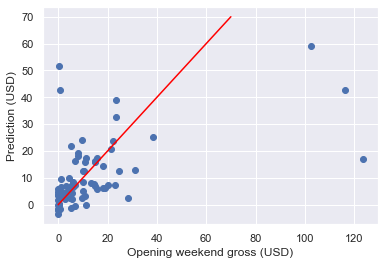

In [373]:
# Reports for model with all features
split_and_validate(X,y)

In [314]:
# Reports for model with features of movie only
# X, y = get_Xy(c_movie_df)
# split_and_validate(X,y)

In [374]:
def get_score(X_train,X_val,y_train,v_val):
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Validation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')
        
    
    # Visualization
    fig, ax = plt.subplots(1, 1)
    plt.scatter(y_val, y_pred)

    ax.set_xlabel('Opening weekend gross (USD)')
    ax.set_ylabel('Prediction (USD)')

#     ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8])
#     ax.set_xticklabels(['0','20M','40M','60M','80M'])
#     ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
#     ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

    x=np.linspace(-2,2,50)
#     x=np.linspace(4,9,50)
    
    y=x
    plt.plot(x,y,color='red')

### Cross-validation

In [385]:
# Will not use X_test, y_test
lc_df = all_df[['log_owu'] + con_feature + con_book_feature + \
               ['rating','rating_count_b','rating_count_b','review_count_b']].copy()
X, y = get_Xy(lc_df)
lr = LinearRegression()
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

ValueError: list.remove(x): x not in list

In [386]:
result = cross_val_score(lr, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

In [387]:
# mean of val_score
print("Meam of validation score is:", np.mean(result))
print(result)

Meam of validation score is: 0.2432231877394207
[ 0.4965097   0.28843434 -0.19904722  0.21210748  0.41811164]


In [388]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 1 to 1516
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   movie_title             596 non-null    object        
 1   rating                  596 non-null    float64       
 2   MPAA                    596 non-null    object        
 3   genre                   596 non-null    object        
 4   release_date            596 non-null    datetime64[ns]
 5   budget                  596 non-null    float64       
 6   opening_weekend_usa     596 non-null    float64       
 7   gross_usa               596 non-null    float64       
 8   gross_world             596 non-null    float64       
 9   runtime                 596 non-null    float64       
 10  director                596 non-null    object        
 11  writer                  596 non-null    object        
 12  actor                   596 non-null    object   

### Find outliers and evaluate the model again

In [389]:
lc_df = all_df[['movie_title'] + ['opening_weekend_usa'] + con_feature + con_book_feature + \
               ['genre','release_year','author_popularity','film_count_d','rating']].copy()

In [390]:
X = lc_df[con_feature + con_book_feature + ['rating']]
y = lc_df['opening_weekend_usa']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.15, random_state=58)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lc_df['res'] = lr.predict(lc_df[con_feature + con_book_feature + ['rating']])-lc_df['opening_weekend_usa']

In [391]:
lc_df[['movie_title','release_year','res','genre','author_popularity','film_count_d']].sort_values(['res']).head(10)

,movie_title,release_year,res,genre,author_popularity,film_count_d,film_count_d
38,The Hunger Games,2012,-127.714733,"{Action, Adventure, Sci-Fi}",0.0030,2,2
62,It,2017,-92.562529,{Horror},0.6746,2,2
60,Fifty Shades of Grey,2015,-74.261091,"{Drama, Romance, Thriller}",2.4528,3,3
261,Alice in Wonderland,2010,-71.626951,"{Family, Adventure, Fantasy}",0.0001,18,18
40,Twilight,2008,-59.193923,"{Drama, Romance, Fantasy}",0.0010,3,3
30,Harry Potter and the Goblet of Fire,2005,-56.598061,"{Family, Adventure, Fantasy}",0.0085,14,14
51,Harry Potter and the Prisoner of Azkaban,2004,-56.055249,"{Family, Adventure, Fantasy}",0.0101,5,5
73,Harry Potter and the Chamber of Secrets,2002,-54.449833,"{Family, Adventure, Fantasy}",0.0101,10,10
334,The Twilight Saga: Eclipse,2010,-51.675559,"{Drama, Action, Adventure}",0.0054,5,5
2,Harry Potter and the Sorcerer's Stone,2001,-50.907300,"{Family, Adventure, Fantasy}",0.0121,9,9


In [392]:
lc_df[['movie_title','release_year','res','genre','author_popularity','film_count_d']].sort_values(['res']).tail(10)

,movie_title,release_year,res,genre,author_popularity,film_count_d,film_count_d
82,Mortal Engines,2018,21.171621,"{Action, Adventure, Fantasy}",0.0008,1,1
717,The Postman,1997,21.564484,"{Drama, Action, Adventure}",0.0292,1,1
168,Cloud Atlas,2012,22.729239,"{Drama, Mystery, Action}",0.3689,11,11
348,The Lovely Bones,2010,22.803954,"{Drama, Thriller, Fantasy}",0.0002,10,10
237,Big Fish,2004,23.752286,"{Drama, Adventure, Fantasy}",0.0121,14,14
119,The Golden Compass,2007,24.098951,"{Family, Adventure, Fantasy}",0.0025,4,4
667,The 13th Warrior,1999,31.569909,"{Action, Adventure, Other}",0.0227,8,8
684,Live by Night,2017,31.673302,"{Drama, Crime, Action}",0.0002,3,3
581,Memoirs of a Geisha,2005,34.278572,"{Drama, Romance}",0.0149,1,1
77,The Revenant,2016,35.017507,"{Drama, Action, Adventure}",0.0001,7,7


## 2. Basic Feature Engineering

### Split the data set into Train / Validation / Test sets

In [393]:
# Choose df
# X, y = get_Xy(c_movie_df)
X, y = get_Xy(lc_df)

# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=21)

### * Scaled Features

In [394]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

ValueError: could not convert string to float: 'A Time to Kill'

In [395]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train), lr.score(scaler.transform(X_val),y_val)

ValueError: Found input variables with inconsistent numbers of samples: [219, 357]

In [396]:
list(zip((con_feature),lr.coef_))

AttributeError: 'LinearRegression' object has no attribute 'coef_'

### * Polynomial Fearues
(degree=2): Adding interaction terms and second order feature.

In [397]:
# Only with interaction terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = True)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

lr.fit(X_train_poly,y_train)
lr.score(X_train_poly,y_train), lr.score(X_val_poly,y_val)

ValueError: Found input variables with inconsistent numbers of samples: [219, 357]

In [398]:
# increased train score, but decreased val score.
# overfitting

In [399]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,interaction_only = False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)

lr.fit(X_train_poly,y_train)
lr.score(X_train_poly,y_train), lr.score(X_val_poly,y_val)

ValueError: Found input variables with inconsistent numbers of samples: [219, 357]

In [400]:
# overfitting even more

## 3. Intermediate Feature Engineering: Categorical features
Use `OneHotEncoder` or `pd.get_dummies(df['column'])` to treat categorical variables

### 1. genre

In [401]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['log_owu'] + con_feature + ['genre']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

ValueError: list.remove(x): x not in list

In [201]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1).drop(columns=['Other'])



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1).drop(columns=['Other'])


Train R^2 score was: 0.39082477094178225
Validation R^2 score was: 0.13956753839291458
Feature coefficient results: 

budget : 0.05
runtime : -0.07
film_count_d : -0.08
avg_rating_d : -0.06
avg_gross_d : -0.03
T_movie_age : 0.12
genre : 0.04


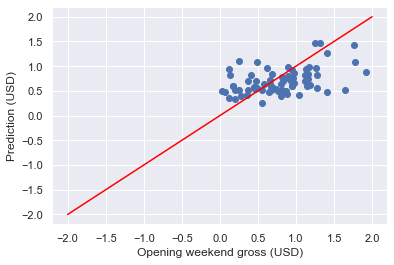

In [202]:
get_score(X_train, X_val, y_train, y_val)

### 2. MPAA rating

In [203]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['MPAA']]
df = all_df[['log_owu'] + con_feature + ['genre'] + ['MPAA']]
# df = all_df[['rating'] + con_feature + con_book_feature + ['genre']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [204]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['MPAA'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.3780790603877322
Validation R^2 score was: 0.141913050846462
Feature coefficient results: 

budget : 0.03
runtime : 0.03
film_count_d : 0.03
avg_rating_d : 0.03
avg_gross_d : 0.03
T_movie_age : 0.03
genre : -0.06
MPAA : 0.03


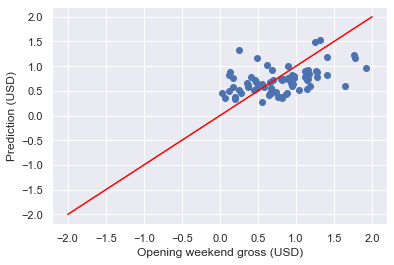

In [205]:
get_score(X_train, X_val, y_train, y_val)

### 3. language

In [141]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['language']]
df = all_df[['log_owu'] + con_feature + ['genre'] + ['MPAA'] + ['language']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [142]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['language'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.36791567158266103
Validation R^2 score was: 0.12186386652626269
Feature coefficient results: 

budget : 0.00
runtime : -0.03
film_count_d : 0.11
avg_rating_d : 0.06
avg_gross_d : 0.12
T_movie_age : -0.01
genre : -0.17
MPAA : 0.19
language : 0.06


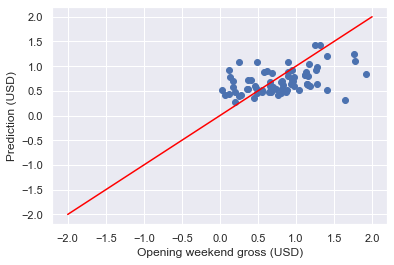

In [143]:
get_score(X_train, X_val, y_train, y_val)

### 4. country

In [144]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['log_owu'] + con_feature + ['country']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [145]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.37244645445461344
Validation R^2 score was: 0.14246124108956904
Feature coefficient results: 

budget : 0.14
runtime : -0.09
film_count_d : 0.10
avg_rating_d : -0.04
avg_gross_d : -0.13
T_movie_age : 0.00
country : 0.21


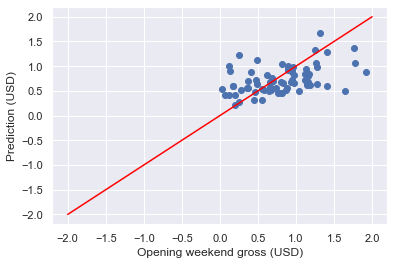

In [146]:
get_score(X_train, X_val, y_train, y_val)

### 5. distributor

In [148]:
# Get the data from all_df with both continuous and categorical variables
df = all_df[['log_owu'] + con_feature + ['distributor']]
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)

In [149]:
# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert genre to dummies
X_train_genre = X_train['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_train_con = X_train[con_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['distributor'].str.join(sep='*').str.get_dummies(sep='*')

# Scaling continuous variables
X_val_con = X_val[con_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.3648405665133819
Validation R^2 score was: 0.1308240002351878
Feature coefficient results: 

budget : 10799583985341.18
runtime : 19802810389604.75
film_count_d : -5665992649808.31
avg_rating_d : -28183544513452.87
avg_gross_d : -59672665705827.69
T_movie_age : -38877189123126.34
distributor : -25799482557354.68


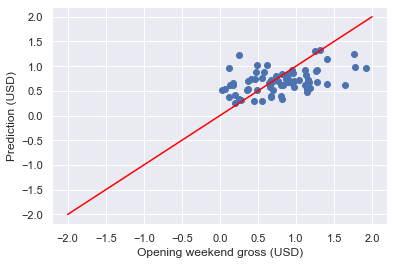

In [150]:
get_score(X_train, X_val, y_train, y_val)

### 6. all categorical variable

In [152]:
# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
df = all_df[['log_owu'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])

# Scaling continuous variables
X_train_con = X_train[con_feature + con_book_feature]
X_train_con_scaled = scaler.fit_transform(X_train_con)
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])

# Scaling continuous variables
X_val_con = X_val[con_feature + con_book_feature]
X_val_con_scaled = scaler.fit_transform(X_val_con)
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.5314948790031855
Validation R^2 score was: 0.10965689382052435
Feature coefficient results: 

budget : 0.02
runtime : -0.09
film_count_d : -0.15
avg_rating_d : -0.02
avg_gross_d : -0.09
T_movie_age : 0.07
T_book_age : -0.06
publish_year : -0.04
page : 0.06
log_book_popularity : -0.12
log_author_popularity : 0.06
genre : 0.03
MPAA : 0.03
language : 0.15
country : 0.01
distributor : 0.03


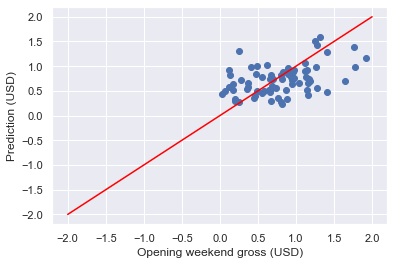

In [153]:
get_score(X_train, X_val, y_train, y_val)

In [156]:
def all_variable_score(df_type):
    
    
    if df_type == 'movie only':
        con = con_feature
        df = all_df[['log_owu'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
    
    if df_type == 'movie+book':
        con = con_feature + con_book_feature
        df = all_df[['log_owu'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
    
    try:
        X, y = get_Xy(df)
    except UnboundLocalError:
        print("Pick 'movie only' or 'movie+book'")



    # train_test_split
    X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


    # Train set
    # Convert all cat to dummies
    X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_MPAA = pd.get_dummies(X_train['MPAA'])
    X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
    X_train_distributor = pd.get_dummies(X_train['distributor'])

    # Scaling continuous variables
    X_train_con = X_train[con]
    X_train_con_scaled = scaler.fit_transform(X_train_con)
    X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns=X_train_con.columns, index=X_train_con.index)

    #Combine
    X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                         X_train_con_scaled_df],axis=1)



    # Val set
    # Convert genre to dummies
    X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_MPAA = pd.get_dummies(X_val['MPAA'])
    X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
    X_val_distributor = pd.get_dummies(X_val['distributor'])

    # Scaling continuous variables
    X_val_con = X_val[con]
    X_val_con_scaled = scaler.fit_transform(X_val_con)
    X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns=X_val_con.columns, index=X_val_con.index)

    #Combine
    X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                       X_val_con_scaled_df],axis=1)
    
    return get_score(X_train, X_val, y_train, y_val)


Train R^2 score was: 0.5116214901842491
Validation R^2 score was: 0.11805549099934287
Feature coefficient results: 

budget : 0.01
runtime : -0.07
film_count_d : -0.13
avg_rating_d : 0.00
avg_gross_d : -0.07
T_movie_age : 0.05
T_book_age : -0.02
publish_year : -0.01
page : 0.07
log_book_popularity : -0.09
log_author_popularity : 0.08
genre : 0.01
MPAA : 0.06
language : 1038216080700.27
country : 1038216080700.15
distributor : 1038216080700.16


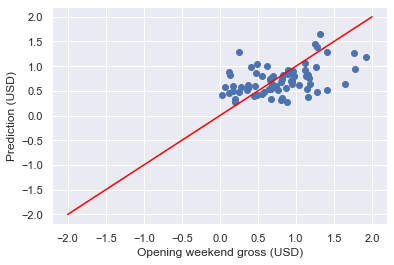

In [157]:
all_variable_score('movie only')


Train R^2 score was: 0.5314948790031855
Validation R^2 score was: 0.10965689382052435
Feature coefficient results: 

budget : 0.02
runtime : -0.09
film_count_d : -0.15
avg_rating_d : -0.02
avg_gross_d : -0.09
T_movie_age : 0.07
T_book_age : -0.06
publish_year : -0.04
page : 0.06
log_book_popularity : -0.12
log_author_popularity : 0.06
genre : 0.03
MPAA : 0.03
language : 0.15
country : 0.01
distributor : 0.03


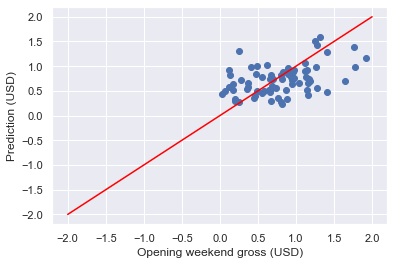

In [158]:
all_variable_score('movie+book')

## 4. Incorporate Polynomial Features

In [159]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only = True)


# Get the data from all_df with both continuous and categorical variables
# df = all_df[['opening_weekend_usa'] + con_feature + ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
df = all_df[['log_owu'] + con_feature + con_book_feature + \
            ['genre'] + ['MPAA'] + ['language'] + ['country'] + ['distributor']]
# df = all_df[['gross_usa'] + con_feature + con_book_feature + ['genre']]
X, y = get_Xy(df)



# train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=3)


# Train set
# Convert all cat to dummies
X_train_genre = X_train['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_train_MPAA = pd.get_dummies(X_train['MPAA'])
X_train_language= X_train['language'].str.join(sep='*').str.get_dummies(sep='*')
X_train_country = X_train['country'].str.join(sep='*').str.get_dummies(sep='*')
X_train_distributor = pd.get_dummies(X_train['distributor'])

# Scaling continuous variables
X_train_con = X_train[con_feature + con_book_feature]
X_train_con_scaled = poly.fit_transform(scaler.fit_transform(X_train_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature+con_book_feature) # poly coef columns
X_train_con_scaled_df = pd.DataFrame(X_train_con_scaled, columns = poly_column,\
                                     index=X_train_con.index)

#Combine
X_train = pd.concat([X_train_genre,X_train_MPAA, X_train_language, X_train_country, X_train_distributor,\
                     X_train_con_scaled_df],axis=1)



# Val set
# Convert genre to dummies
X_val_genre = X_val['genre'].str.join(sep='*').str.get_dummies(sep='*')
X_val_MPAA = pd.get_dummies(X_val['MPAA'])
X_val_language= X_val['language'].str.join(sep='*').str.get_dummies(sep='*')
X_val_country = X_val['country'].str.join(sep='*').str.get_dummies(sep='*')
X_val_distributor = pd.get_dummies(X_val['distributor'])

# Scaling continuous variables
X_val_con = X_val[con_feature + con_book_feature]
X_val_con_scaled = poly.transform(scaler.fit_transform(X_val_con)) # standardscalar and polyfeatrues
poly_column = poly.get_feature_names(con_feature+con_book_feature) # poly coef columns
X_val_con_scaled_df = pd.DataFrame(X_val_con_scaled, columns = poly_column,\
                                   index=X_val_con.index)

#Combine
X_val = pd.concat([X_val_genre,X_val_MPAA, X_val_language, X_val_country, X_val_distributor, \
                   X_val_con_scaled_df],axis=1)


Train R^2 score was: 0.6879884958458165
Validation R^2 score was: -0.23564659718506542
Feature coefficient results: 

budget : 0.00
runtime : -0.06
film_count_d : -0.20
avg_rating_d : -0.00
avg_gross_d : -0.10
T_movie_age : 0.01
T_book_age : -0.04
publish_year : -0.03
page : 0.02
log_book_popularity : -0.18
log_author_popularity : 0.10
genre : 0.04
MPAA : 0.04
language : 2262885685033.65
country : 2262885685033.47
distributor : 2262885685033.49


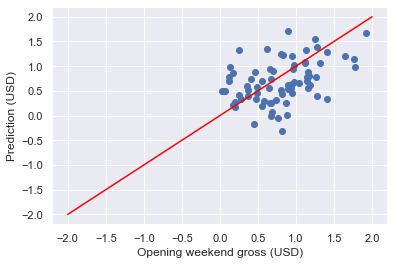

In [160]:
get_score(X_train, X_val, y_train, y_val)

## 4. Regularization

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

### * Ridge

In [162]:
## Fit a Ridge model on the standardized data

# ridge_model = Ridge(alpha = 0.001)
# ridge_model.fit(X_train,y_train)
# list(zip(X_train.columns, ridge_model.coef_))

In [163]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha

alphavec = 10**np.linspace(-2,2,1000)

ridge_model = RidgeCV(alphas = alphavec, cv=5)
ridge_model.fit(X_train, y_train)
print('The best value of alpha is:', ridge_model.alpha_)

The best value of alpha is: 100.0


In [164]:
# Fit Ridge model once again with the best alpha
ridge_model = Ridge(alpha = 100)
ridge_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, ridge_model.coef_))

[('1', 0.0),
 ('budget', 0.10875737401159546),
 ('runtime', 0.04031335478557957),
 ('film_count_d', 0.002292844907609919),
 ('avg_rating_d', -0.007853164264279755),
 ('avg_gross_d', 0.011126499240478968),
 ('T_movie_age', -0.07051789011890401),
 ('T_book_age', 0.009899277601177509),
 ('publish_year', -0.007044421006198682),
 ('page', 0.006059738505079036),
 ('log_book_popularity', 0.02014532973619856),
 ('log_author_popularity', -0.02873171503838875),
 ('budget runtime', -0.004310850297643323),
 ('budget film_count_d', 0.022346748570256127),
 ('budget avg_rating_d', 0.005747092872747829),
 ('budget avg_gross_d', 0.010358219541763847),
 ('budget T_movie_age', 0.014861893186755614),
 ('budget T_book_age', -0.006711781067892129),
 ('budget publish_year', 0.004977251567064132),
 ('budget page', 0.01682099354626786),
 ('budget log_book_popularity', 0.011211802089079147),
 ('budget log_author_popularity', -0.037667364338207915),
 ('runtime film_count_d', 0.020846383019639002),
 ('runtime avg

In [165]:
val_pred = ridge_model.predict(X_val_con_scaled_df)
r2_score(y_val, val_pred)

0.1706860542394536


Train R^2 score was: 0.6879884958458165
Validation R^2 score was: -0.23564659718506542
Feature coefficient results: 

budget : 0.00
runtime : -0.06
film_count_d : -0.20
avg_rating_d : -0.00
avg_gross_d : -0.10
T_movie_age : 0.01
T_book_age : -0.04
publish_year : -0.03
page : 0.02
log_book_popularity : -0.18
log_author_popularity : 0.10
genre : 0.04
MPAA : 0.04
language : 2262885685033.65
country : 2262885685033.47
distributor : 2262885685033.49


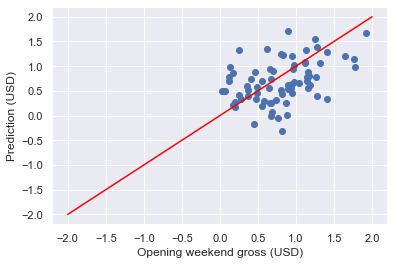

In [166]:
get_score(X_train, X_val, y_train, y_val)

### * LASSO

In [167]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, lasso_model.coef_))

[('1', 0.0),
 ('budget', 0.18266858301081365),
 ('runtime', 0.057307027524801366),
 ('film_count_d', 0.004276422608674704),
 ('avg_rating_d', -0.04386058759808451),
 ('avg_gross_d', 0.0),
 ('T_movie_age', -0.11203303141845657),
 ('T_book_age', 0.0),
 ('publish_year', -0.05581462126018522),
 ('page', -0.008501038541509154),
 ('log_book_popularity', 0.059275333948691736),
 ('log_author_popularity', -0.04769368832772793),
 ('budget runtime', -0.0433782443558193),
 ('budget film_count_d', 0.049128800837325654),
 ('budget avg_rating_d', 0.027987676879586258),
 ('budget avg_gross_d', -0.010055277823134692),
 ('budget T_movie_age', 0.040234512767532385),
 ('budget T_book_age', -0.0529120755698579),
 ('budget publish_year', -0.04220520459528251),
 ('budget page', 0.08820266367394271),
 ('budget log_book_popularity', 0.044756268143213845),
 ('budget log_author_popularity', -0.09903775493560024),
 ('runtime film_count_d', 0.057908220030238),
 ('runtime avg_rating_d', -0.03073614746447621),
 ('ru

In [168]:
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha


alphavec = 10**np.linspace(-5,5,1000)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_con_scaled_df, y_train)
print('The best value of alpha is:', lasso_model.alpha_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003024201937272153, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030374019350034587, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030254677786789586, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinat

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004924648494943895, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004909513548263078, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0048946906836633275, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004519715542205205, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004513200145524365, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004506827747590592, tolerance: 0.002952937322313876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014219648937222829, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014137658636911965, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014062161761376757, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011527318632197137, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011482363070074442, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011438299837635668, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010630956272699166, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010612651886285462, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010594491812485174, tolerance: 0.0031246098102659823
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0031485118190737182, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003711199451821301, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003880720747552857, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011778875072330663, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010868302855030265, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010411769054421427, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033553452871531775, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03348973717763215, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03342725915382161, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03400282487915973, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033978812811614745, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03395434954157217, tolerance: 0.0029817620732051128
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005815657451455181, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00577337844063841, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0057268025316545845, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004513941320865911, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004491251237061178, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004469032151366292, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003942794849777442, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003934161032862704, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003925623105260456, tolerance: 0.003332761062086141
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003555362259252348, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005666596555343517, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007298136975938618, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025351579664409485, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025268242325207524, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02516845903949161, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021493771169190268, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021894182164583498, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022096916248399268, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_

The best value of alpha is: 0.03660695147596903


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020434269855723386, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0204038408199132, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020374050805950006, tolerance: 0.003509637059152837
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_de

In [169]:
lasso_model = Lasso(alpha = 2.08)
lasso_model.fit(X_train_con_scaled_df,y_train)
list(zip(X_train_con_scaled_df.columns, lasso_model.coef_))

[('1', 0.0),
 ('budget', 0.0),
 ('runtime', 0.0),
 ('film_count_d', 0.0),
 ('avg_rating_d', 0.0),
 ('avg_gross_d', 0.0),
 ('T_movie_age', -0.0),
 ('T_book_age', 0.0),
 ('publish_year', -0.0),
 ('page', 0.0),
 ('log_book_popularity', -0.0),
 ('log_author_popularity', -0.0),
 ('budget runtime', 0.0),
 ('budget film_count_d', 0.0),
 ('budget avg_rating_d', 0.0),
 ('budget avg_gross_d', 0.0),
 ('budget T_movie_age', -0.0),
 ('budget T_book_age', 0.0),
 ('budget publish_year', -0.0),
 ('budget page', -0.0),
 ('budget log_book_popularity', 0.0),
 ('budget log_author_popularity', -0.0),
 ('runtime film_count_d', 0.0),
 ('runtime avg_rating_d', -0.0),
 ('runtime avg_gross_d', 0.0),
 ('runtime T_movie_age', -0.0),
 ('runtime T_book_age', -0.0),
 ('runtime publish_year', 0.0),
 ('runtime page', 0.0),
 ('runtime log_book_popularity', -0.0),
 ('runtime log_author_popularity', -0.0),
 ('film_count_d avg_rating_d', 0.0),
 ('film_count_d avg_gross_d', 0.0),
 ('film_count_d T_movie_age', -0.0),
 ('fil

In [170]:
val_pred = lasso_model.predict(X_val_con_scaled_df)
r2_score(y_val, val_pred)

-0.038687970779366365